# Infinite potential well and variational principle

One of the physical systems that can be studied by mean of Schrödinger equation is the infinite potential well. An infinite potential well is a unidimensional potential in which a particle is confined and that respects the following conditions:

$$ V(x) = \begin{cases}  \infty & x < 0 \vee x > a \\
0 &  0 \leq x \leq a
\end{cases}$$

Hence, by choosing the proper boundary conditions (i.e. $\psi(0) = \psi(a) = 0$ and the normalization of the wavefunction) we can determine an analytic expression for the quantized energetic levels and a formula for the wavefunctions: 

$$E_{n} = \frac{\hbar^2\pi^2}{2ma^2}n^2, \hspace{1cm} n\in N \backslash \{0\}$$

$$\psi_{n}(x) = \sqrt{\frac{2}{a}}\sin{(\frac{n\pi}{a}x)}$$

Anyway it is not always so obvious to solve Schrödinger equation, expecially in realistic systems (such as molecules) where an analytic solution (as the one seen before) cannot be found. In this case it results useful to follow a different approach which may take into account approximations but that would change the problem into a much simpler one. The suggested method is a consequence of the so-called "variational principle" which regards all those problems that can be solved with the "calculus of variations". All the fields of physics have their own variational principle (the "least action principle" in rational mechanics or "Maupertuis' principle" in classical mechanics) and the one regarding quantum physics is the "variational method". According to the variational method: 

a state $|\psi\rangle$ for which the expectation value of the Hamiltonian $\langle H \rangle_{\psi}$ is stationary with respect to any perturbation $|\delta\psi\rangle$, is an eigenstate of $H$. Similarly, the Schrödinger equation can be recovered from a stationary condition.

Starting from the definition of expected value of the Hamiltonian on a state $|\psi\rangle$:

$$E = \langle H \rangle_{\psi} = \frac{\langle \psi | H | \psi \rangle}{\langle \psi | \psi \rangle}$$


and by imposing that $\delta E = \langle H \rangle_{\psi + \delta \psi} - \langle H \rangle_{\psi} = 0$  (where $\langle H \rangle_{\psi + \delta \psi}$ is the expected value of the Hamiltonian on a state that differs by a small variation $\delta\psi$ from the state $\psi$) it is possible to recover Schrödinger equation: $H|\psi\rangle = E|\psi\rangle$. Hence the state $|\psi\rangle$ s.t. $\delta E = \delta \langle H \rangle_{\psi} = 0$ is eigenvectors of the hamiltonian $H$. The consequence of this statement is that we can find eigenstates and eigenvalues of the hamiltonian by looking for those states that make the hamiltonian stationary. This becomes particulatrly useful when we cannot solve Schrödinger equation analitically, for example in those cases in which we have to solve a finite-dimensional Hilbert space (i.e. generated by a finite basis set $ \{ | \phi_{i}  \rangle\}$. Such basis vectors may be orthonormal or not). In this situation we can write a generic state $|\psi\rangle$ as:

$$|\psi\rangle = \sum_{i}^{N}c_i|\phi_i\rangle$$ 

and it is possible to obtain, after some calculation, an alternative enunciate of the variational method: 

$$\langle H \rangle_{\psi} > E_0 $$

the expected value of the hamiltonian on a generic state $|\psi\rangle$ is always an upper bound of the ground state $E_0$ (and of some excited states). The higher the number of vector basis of the Hilbert space as well as the "quality" of such basis, the better the approximation. According to the variational method the energy $E$ is an eigenvalue of the hamiltonian if it is a stationary point with respect to the variations of the state $|\psi\rangle$ i.e. $dE/dc_i = 0$ for $i$ going from 1 to $N$. It would be of interest to find the state $|\psi\rangle$ that satisfies this condition , hence to find the set coefficients $\{ c_i\}$ so that we can write the state as shown previously. If we develop $dE/dc_i$ we can reconduct the problem to a matrix problem which is easily solvable by computer. We have to take into account anyway that if the basis set is orthonormal (i.e. $\langle \phi_i | \phi_j \rangle = \delta_{ij}$) we can write our problem as:

$$H\vec{c} = E\vec{c}$$


otherwise the scalar product $\langle \phi_i | \phi_j \rangle$ gives origin to the element $S_{ij}$ of a so-called "overlap matrix" (which is hermitian, hence its eigenvalues are real) and our problem becomes a generalized eigenvalue equation:

$$H\vec{c} = ES\vec{c}$$

We finally have to choose a basis set. We are asked to use the basis:

$$ \phi_n(x) = (x-1)^n(x-2)x$$

that respect the boundary conditions imposed by the infinite potential well. These basis vectors are not orthonormal hence we will have to solve a generalized eigenvalues equation.

We import some useful libraries and define some global variables:

In [1]:
import numpy as np
from math import sqrt, pi, sin
#import cmath
import matplotlib.pyplot as plt
from scipy.linalg import eig

In [2]:
N = 5 # number of basis vectors
a = 2 # length of the potential well in a.u.
n = np.arange(N) + 1 # energetic level for the analytic function
#m_e = 9.11*10**-31
#hbar = 1.0551*10**-34

We need an expression for the elements of the overlap matrix $S$ and another one for those of the hamiltonian matrix $H$. What we know from before is that the generic element $S_{ij}$ of the overlap matrix is given by the scalar product of two generic basis vectors:

$$S_{ij} = \langle \phi_i | \phi_j\rangle = \int_0^{2} \phi_i^{*}(x)\phi_j(x)dx = \int_0^{2} \phi_i(x)\phi_j(x)dx$$

If we set $(x-1) = t$, after some computation we solve the integral and we obtain:

$$ S_{ij} = \begin{cases}  \frac{2}{i + j + 5} + \frac{2}{i + j + 1} - \frac{4}{i + j + 3} & \mbox{i + j even} \\
0 &  \mbox{i + j odd}
\end{cases}$$

In [3]:
def is_even(i,j):
    if ((i+j) % 2 == 0):
        return True
    else:
        return False

In [4]:
#We have to obtain the S  matrix elements by means of an analitycal expression

def get_Sij(i,j):
    if is_even(i,j):
        Sij = 2/(5 + i +j) + 2/(1 + i + j) - 4/(3 + i +j)
    else:
        Sij = 0
    return Sij

In [5]:
def get_S(n):
    S = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            S[i,j] = get_Sij(i,j)
    return S

In [6]:
S = get_S(N)

In the same way we find an expression for the elements of the hamiltonian matrix by solving the following integral (remember that in Rydberg units the hamiltonian turns into a simple second derivative):

$$H_{ij} = \langle \phi_i| H | \phi_j \rangle = \int_0^{2} \phi_i(x) (-\frac{d^2}{d^2x})\phi_j(x) dx$$

$$H_{ij}=\begin{cases}   -2\frac{(j^2 + 3j + 2)}{(i + j +3)} + 2\frac{j(1-j)}{(i + j -1)} + 4\frac{(j^2 + j + 1)}{(i + j +1)} & \mbox{i + j even} \\ 0 & \mbox{i + j odd}
\end{cases}$$

In [7]:
def get_Hij(i,j): 
    if is_even(i,j):
        #Hij = -2*(j**2 + 3*j + 2)/(i + j + 3) + 2*j*(1-j)/(i + j -1) + 4*(j**2 + j + 1)/(i + j +1)
        
        Hij = -8*((1 - i - j - 2*i*j)/((i + j + 3)*(i + j + 1)*(i + j - 1)))
        
    else:
        Hij = 0
    return Hij

In [8]:
def get_H(n):
    H = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            H[i,j] = get_Hij(i,j)
    return H

In [9]:
H = get_H(N)

We find the eigenvalues and eigenvectors of matrix S by mean of a unitary matrix Q (S is hermitian hence it is diagonalized by a unitary matrix which means $Q^{\dagger} = Q^{-1}$):

In [10]:
s, Q = np.linalg.eig(S)

At this point we may wish to verify the correctness of our diagonalization which means to check that the matrix product $Q^{\dagger}SQ$ equals a matrix with zero entries except on the main diagonal where the eigenvalues are present. This check may require a very long time if it had to be executed by a person and so we can use the Numpy command "np.allclose(A, B, atol)" which verifies if two entries "A" and "B" correspond within a certain range "atol" (the default range is $10^{-5}$ but it can be manually changed as shown is successive checks). If the hceck is succesfull the string "True" is printed, "False" otherwise.

In [11]:
# Counterproof of the correctness of diagonalization of S. The eigenvalues of S are present on the main diagonal of matrix D_s:

D_s = np.dot(np.linalg.inv(Q), np.dot(S, Q))

print(np.allclose(np.dot(np.linalg.inv(Q), np.dot(S, Q)), np.diag(s)))

True


We now find a matrix $A$ such that it has the reciprocal of the square root of the eigenvectors of $S$ on the main diagonal.

In [12]:
sqrt_s = []
for i in s:
    sqrt_s.append(1/sqrt(i))
A = np.diag(sqrt_s)

A_t = np.transpose(A)
A_dagger = np.conj(A_t)


We now verify that $A^{\dagger}D_sA = I$

In [13]:
print(np.allclose(np.dot(A_dagger, np.dot(D_s, A)), np.eye(N,N), atol = 1e-04))

True


We define a matrix $P = QA$ and we verify that $P^{\dagger}SP$ equals the indentity matrix. 

In [14]:
P = np.dot(Q,A)
P_t = np.transpose(P)
P_dagger = np.conj(P_t)

A_t = np.transpose(A)
A_dagger = np.conj(A_t)

print(np.allclose(np.dot(P_dagger, np.dot(S, P)), np.eye(N,N), atol=1e-04))

True


The result 'True' confirms that 𝑃†𝑆𝑃 equals the indentity matrix.

Starting from the generalized eigenvalue equation we use the previously found matrices in order to reduce it to an eigenvalue equation:

$$HPu = ESPu$$
$$P^{\dagger}HPu = EP^{\dagger}SPu$$
$$P^{\dagger}HPu = Eu$$
$$\tilde{H}u = Eu$$

In [15]:
H_t = np.dot(P_dagger, np.dot(H, P))

In [16]:
E, u = np.linalg.eigh(H_t)
print(f"The eigenvalues are: {E}")
print("")

The eigenvalues are: [ 2.46740111  9.8753882  22.29340591 50.1246118  87.73919298]



We remind that the actual eigenvectors of the problem are: $c = Pu$

In [17]:
c = np.dot(P, u)

We make a general check of the correctness of the equation: $Hc = ESc$ by iterating over all the eigenvalues and eigenvectors.

In [18]:
check = []
for i in range(len(c)):
    #print(np.allclose(np.dot(H, c[:,i]),    E[i]*np.dot(S, c[:,i])))
    check.append(np.allclose(np.dot(H, c[:,i]),    E[i]*np.dot(S, c[:,i])))
print("Diagonalization check:", np.allclose(check, True))

Diagonalization check: True


Also this test is 'True'. So the formula $Hc = ESc$ has been properly validated.

As we can notice, for eigenvalues and eigenvectors corresponding to higher energetic levels the approximated solution diverges from the analytical one. The only way to overcome this problem is to increase the number of basis vectors.

We now make use of the analytical formulas in order to get the energetic levels and print the various wave functions.

In [19]:
def E_analytic(n, l):
    E = (pi**2/l**2)*n**2
    return E

In [20]:
print(f"The eigenvectors obtained with the analytic formula are:{E_analytic(n, a)}")

The eigenvectors obtained with the analytic formula are:[ 2.4674011   9.8696044  22.2066099  39.4784176  61.68502751]


Now let's draw the analytical autofunctions. Let's define the time interval 'x'.

In [21]:
x = np.linspace(0, 2, 100)

Let's define a new function to get the analycical wave values specifying the width of the potential well, the desired energy level and the x array.

In [22]:
def get_wave_analytic(n, l, x):
    y=sqrt(2/l)*np.sin((n*pi/l)*x)
    return y

Let's now define a new function to plot the first 5 exact eigen functions by using the previous function 'get_wave_analytic'.

In [23]:
def plot_analytical_waves(figurename, x, a, energy_levels):
    fig, axs = plt.subplots(5)
    fig.set_size_inches(18.5, 15)
    for i in range(len(energy_levels)):
        axs[i].plot(x, get_wave_analytic(energy_levels[i], a, x))
        axs[i].plot(x, np.zeros(len(x)), 'k', linestyle = 'dashed')
        axs[i].set_title('Exact eigenfunction n = ' + str(energy_levels[i]))
        if (energy_levels[i] >= 5):
            break
    for ax in axs.flat:
        ax.set(xlabel='x', ylabel='')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    fig.savefig(figurename)

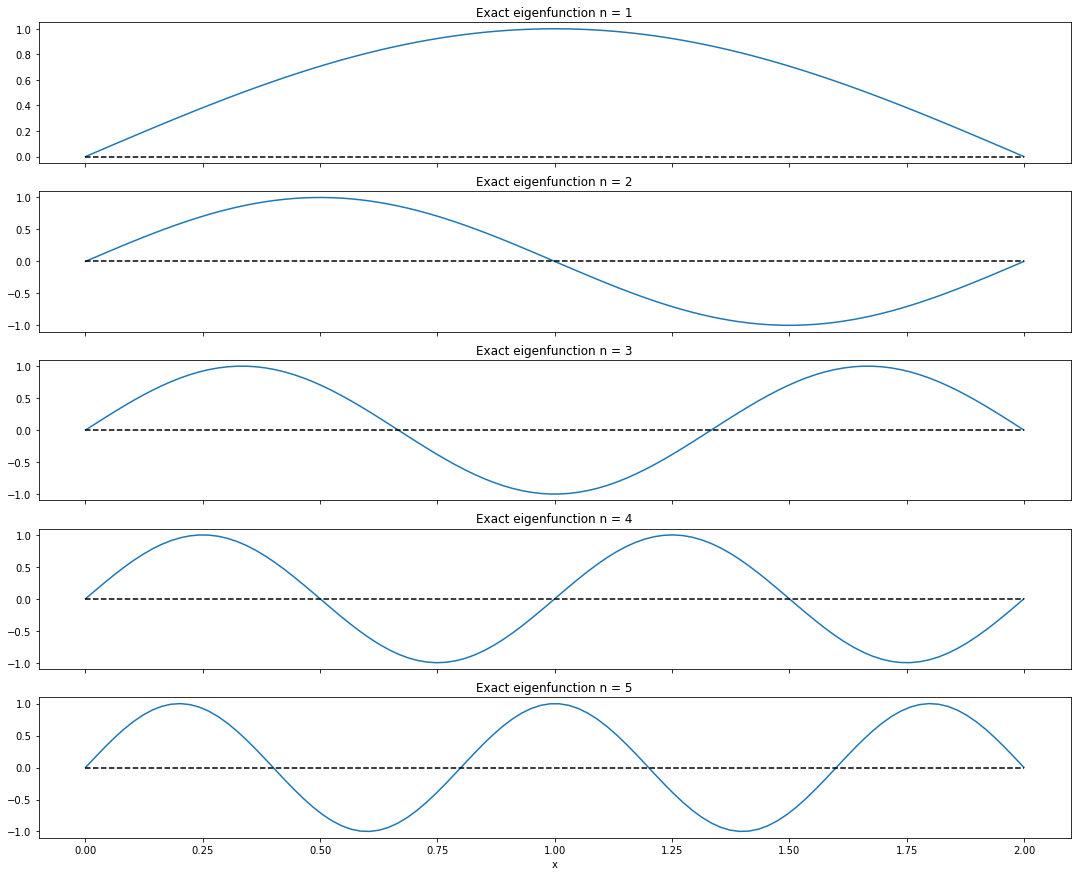

In [24]:
plot_analytical_waves("analytical-waves.png", x, a, n)

We can find the approximated eigenfunctions by making use of the basis vectors introduced at the beginning of the discussion and of the relation: $$|\psi\rangle = \sum_{i}^{N}c_i|\phi_i\rangle$$ 

Let's define a new function to evaluate the generic wave function of the selected basis. 
We recall that the functions of the basis are defined by the following expressions:
$$ \phi_n(x) =  (x-1)^n(x-2)x$$

Now let's provide a new function to evaluate the approximated eigen functions value built using the eigen vector 'v' passed as a parameter.

In [25]:
def approx_wave(v, x):
    y = 0
    for i in range(len(v)):
        y = y + v[i]*((x-1)**(i))*(x-2)*x
    return y

Let's use the previous function to plot the first 5 approximated eigen functions

In [26]:
def plot_approximated_waves(c, x):
    fig, axs = plt.subplots(5)
    fig.set_size_inches(18.5, 15)

    for i in range(len(n)):       
        axs[i].plot(x, approx_wave(c[:,i], x))
        axs[i].plot(x, np.zeros(len(x)), 'k', linestyle = 'dashed')
        axs[i].set_title('Approximated eigenfunction n = ' + str(n[i]))
        if (n[i] >= 5):
            break

    for ax in axs.flat:
        ax.set(xlabel='x', ylabel='')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
    figure_name = f"approximated-waves-{len(c[0,:])}-basis-funcs.png"
    fig.savefig(figure_name)

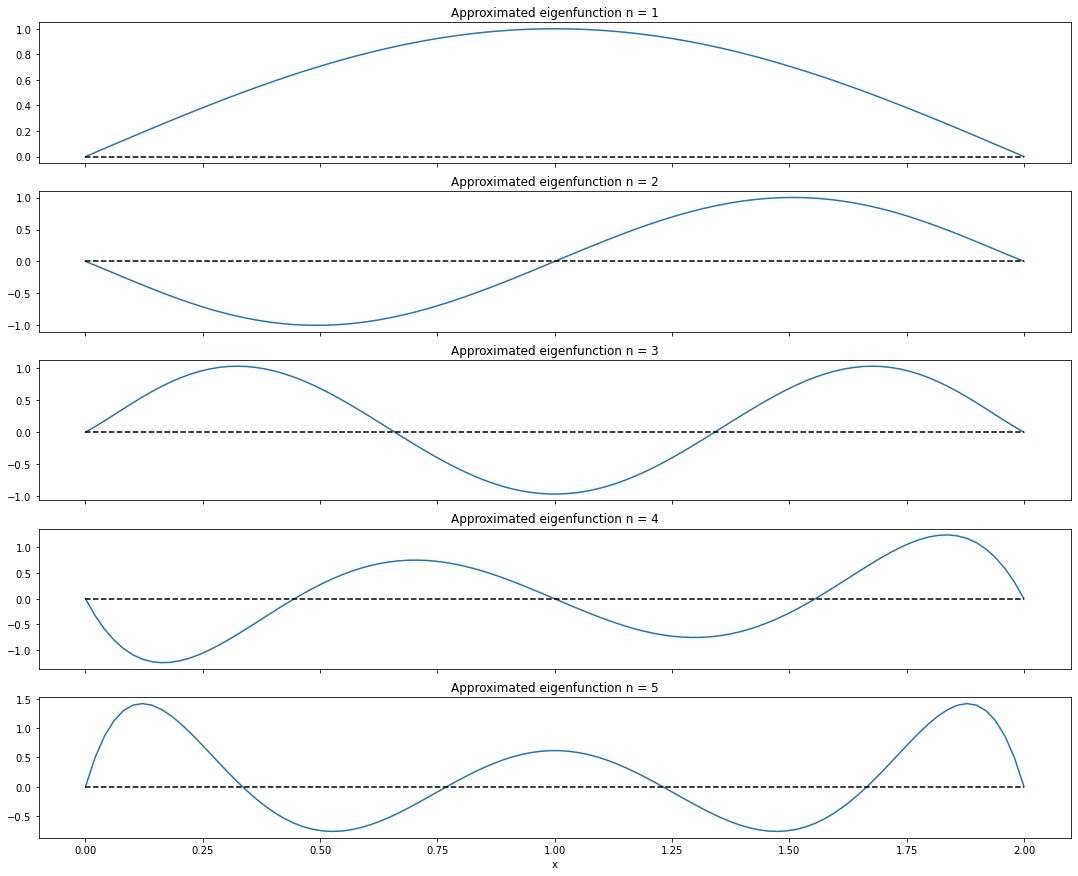

In [27]:
plot_approximated_waves(c, x)

## Question 1

Since we have both an analytical formula and an approximated method to get eigenvalues and eignevectors we would like to make a comparison between the eigenvalues we get with both approaches. What we expect is that the eigenvalues obtained with the approximated method tend to converge to the analytical ones by increasing the number of basis vectors.
In order to address the Question 1 it would be helpful to have a new function to evaluate the eigenvalues and the eigenvector given the dimension of the basis (the number of the functions to be used). Re-using some of the code previously written now we define a new function.

In [28]:
def eig_approx_estimator(N):
    # Overlap matrix
    S = get_S(N)
    # Hamiltonian matrix
    H = get_H(N)
    # eigen values and eigenvectors for Overlap Matri S
    s, Q = np.linalg.eig(S)
    
    # A matrix construction
    sqrt_s = []
    for i in s:
        sqrt_s.append(1/sqrt(i))
    A = np.diag(sqrt_s)
    # A transpose and A dagger construction
    A_t = np.transpose(A)
    A_dagger = np.conj(A_t)
    
    # P, P traspose, P dagger construction
    P = np.dot(Q,A)
    P_t = np.transpose(P)
    P_dagger = np.conj(P_t)

    # H tilde evaluation and diagonalization
    H_t = np.dot(P_dagger, np.dot(H, P))
    E, u = np.linalg.eigh(H_t)
    
    # eigenvectors
    c = np.dot(P, u)
    return E, c

As an example now let's use the function 'eig_approx_estimator' to evaluate the eigenvalues using 5 and 16 autofunctions in the basis and compare them to the exact eigenvalues.

In [29]:
energy_levels_number = 5 # this is also the basis set size
E, u = eig_approx_estimator(energy_levels_number)
print(f"The approximated eigenvalues with {energy_levels_number} basis functions are: {E}")
print("")
e_exact = np.ndarray(shape=(energy_levels_number))
energy_levels = np.arange(energy_levels_number) + 1
for i in range(energy_levels_number):
    e_exact[i] = E_analytic(energy_levels[i], a)
print(f"The first {energy_levels_number} exact eigenvalues are {e_exact}")

The approximated eigenvalues with 5 basis functions are: [ 2.46740111  9.8753882  22.29340591 50.1246118  87.73919298]

The first 5 exact eigenvalues are [ 2.4674011   9.8696044  22.2066099  39.4784176  61.68502751]


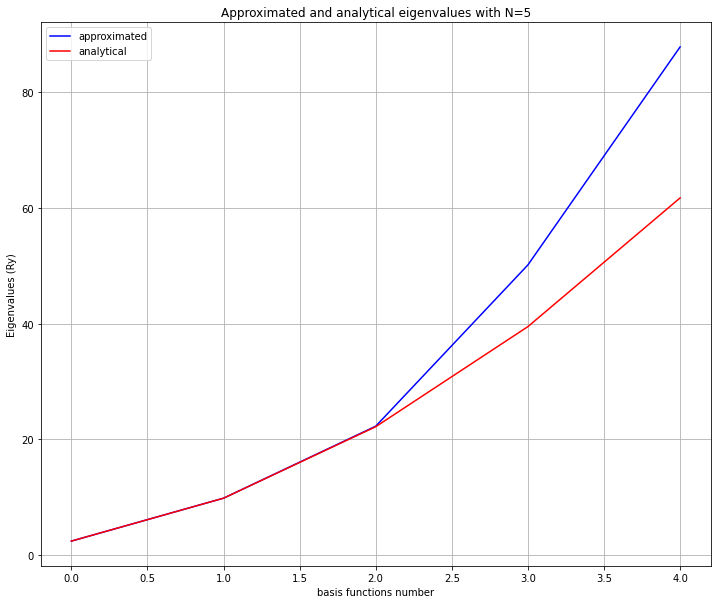

In [30]:
fig = plt.figure(figsize=(12,10))
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel('Eigenvalues (Ry)')
ax.set_xlabel('basis functions number')
basis = np.arange(energy_levels_number)
ax.plot(basis, E, c=colors[0] ,label = "approximated")
ax.plot(basis, e_exact, c=colors[1] ,label = "analytical")

plt.legend()
ax.set_title('Approximated and analytical eigenvalues with N='+ str(energy_levels_number))
ax.grid(True)

Now let's increase to 16 the number of size of the basis set.

In [31]:
energy_levels_number = 16 # this is also the basis set size
E, u = eig_approx_estimator(energy_levels_number)
print(f"The approximated eigenvalues with {energy_levels_number} basis functions are: {E}")
print("")
e_exact = np.ndarray(shape=(energy_levels_number))
energy_levels = np.arange(energy_levels_number) + 1
for i in range(energy_levels_number):
    e_exact[i] = E_analytic(energy_levels[i], a)
print(f"The first {energy_levels_number} exact eigenvalues are {e_exact}")

The approximated eigenvalues with 16 basis functions are: [2.46740110e+00 9.86960440e+00 2.22066099e+01 3.94784176e+01
 6.16850275e+01 8.88264406e+01 1.20903753e+02 1.57920224e+02
 2.00477955e+02 2.48361202e+02 3.22185290e+02 3.94739112e+02
 6.47223127e+02 8.01035213e+02 2.42285013e+03 3.01977423e+03]

The first 16 exact eigenvalues are [  2.4674011    9.8696044   22.2066099   39.4784176   61.68502751
  88.82643961 120.90265391 157.91367042 199.85948912 246.74011003
 298.55553313 355.30575844 416.99078595 483.61061565 555.16524756
 631.65468167]


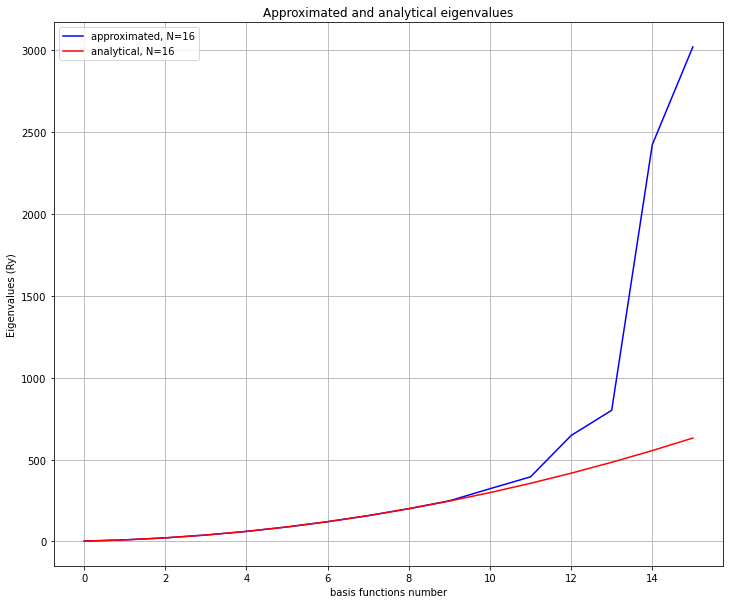

In [32]:
fig = plt.figure(figsize=(12,10))
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel('Eigenvalues (Ry)')
ax.set_xlabel('basis functions number')
basis = np.arange(energy_levels_number)
ax.plot(basis, E, c=colors[0] ,label = "approximated, N=" + str(energy_levels_number))
ax.plot(basis, e_exact, c=colors[1] ,label = "analytical, N=" + str(energy_levels_number))

plt.legend()
ax.set_title('Approximated and analytical eigenvalues')
ax.grid(True)

It's clear that increasing the size of the basis functions set the approximated eigenvalues tend to converge to the exact analytical ones. The higher approximated eigenvalues differ a bit more than the lower ones.

Let's list in the following table some of the eigenvalues (both exact and the approximated ones with an increasing number of the basis functions).

|    | N = 3       | N = 5       | N = 7       | N = 9       | N = 11      | N = 12      | N = 13      | Exact       |
|----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| E1 | 2.46743741  | 2.46740111  | 2.4674011   | 2.4674011   | 2.4674011   | 2.4674011   | 2.4674011   | 2.4674011   |
| E2 | 10.5        | 9.8753882   | 9.86961835  | 9.86960441  | 9.8696044   | 9.8696044   | 9.8696044   | 9.8696044   |
| E3 | 25.53256259 | 22.29340591 | 22.20736704 | 22.20661234 | 22.20660991 | 22.20660991 | 22.2066099  | 22.2066099  |
| E4 |             | 50.1246118  | 39.99797889 | 39.48924103 | 39.47850459 | 39.47841793 | 39.47841793 | 39.4784176  |
| E5 |             | 87.73919298 | 63.60446044 | 61.7606792  | 61.68624765 | 61.68624765 | 61.68503682 | 61.68502751 |

Let's try to automatically evaluate the eigenvalues for an increasing number of basis autofunctions.
We recall that the eigenvalues are in Rydberg units. To converts them to meV we have to multiply each of them for the conversion factor 1Ryd = 13.6 eV and for 1000 to translate to meV. The following functions evaluate the eigenvalues considering an increasing number of basis functons. The results are stored into a matrix returned back by the function.

In [33]:
def eigenvalues_error_v2(energy_levels_number):
    # aprroximated eigenvalues
    basis_size = energy_levels_number
    E_approx = np.zeros([basis_size, energy_levels_number])
    for i in range(basis_size):
        e, c = eig_approx_estimator(i+1)
        for j in range(i+1):
            E_approx[i][j] = e[j]
    return E_approx, c

In [34]:
E_approx, c_approx =eigenvalues_error_v2(energy_levels_number)
print(E_approx)

[[2.50000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.50000000e+00 1.05000000e+01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.46743741e+00 1.05000000e+01 2.55325626e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.46743741e+00 9.87538820e+00 2.55325626e+01 5.01246118e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.

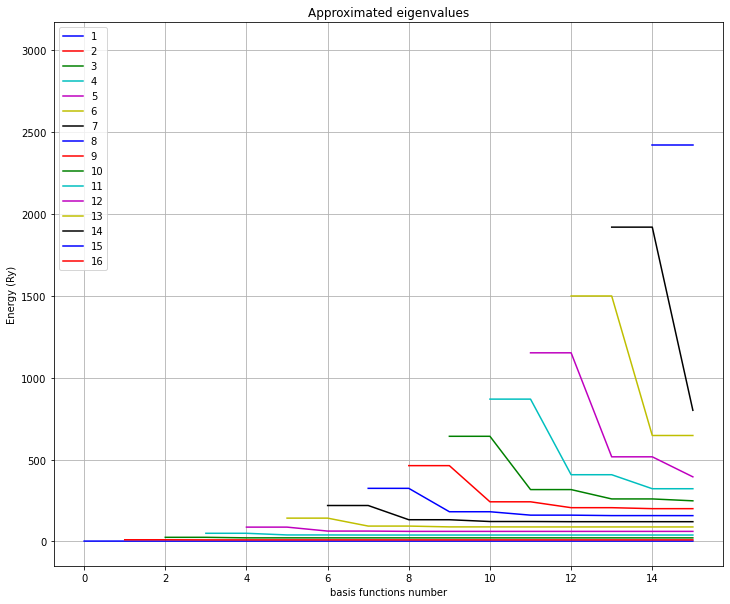

In [35]:
fig = plt.figure(figsize=(12,10))
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel('Energy (Ry)')
ax.set_xlabel('basis functions number')
basis = np.arange(energy_levels_number)
for i in range(energy_levels_number):
    #ax.plot(basis[i:], E_approx[i:, i], c=colors[i%len(colors)] ,label = str(i+1))
    ax.plot(basis[i:], E_approx[i:, i], c=colors[i%len(colors)] ,label = str(i+1))
plt.legend()
ax.set_title('Approximated eigenvalues')
ax.grid(True)

As we can see from the graph, the higher the number of basis vectors, the better the approximation to the analytical eigenvalues. Let's now evaluate the number of basis vectors that ensures an error smaller than 1 meV on the first 5 eigenvalues.

## Question 2

We have all the data stored into the E_approx matrix. In order to find the N = N' that ensures an error on the first 5 eigenvalues smaller than 1 meV let's evaluate the difference between the approximated eigenvalues and the exact (analytical) ones just for the first 5 elements of each row of the matrix. Let's translate the Rydberg units to meV (the conversion factor 13.6 * 1000). The requested N' value is the row index for which the eigenvalues error is less 1 meV in the first 5 entries of the matrix.

In [36]:
for i in range(energy_levels_number):
    E_err_mev = 13.6*1000*(E_approx[i,0:5] - e_exact[0:5])
    #print(f"basis functions number {i+1}: first 5 eigenvalues smaller than 1 meV? result: {(E_err_mev < 1).all()}")
    if ((E_err_mev < 1).all()):
        print(f"The number of basis functions N that ensures an error on the first 5 eigenvalues smaller than 1 meV is {i+1}!")
        break

The number of basis functions N that ensures an error on the first 5 eigenvalues smaller than 1 meV is 13!


Let's now make a comparison between the same eigenfunctions obtained first with N=5 and then with N=13 (which is the number of basis functions that returns an error smaller that 1meV on the first 5 eigenvalues).

The first 5 eigenfunctions obtained with N = 5 and with N = 13 and the exact eigenfunctions are shown here below.

### Exact eigenfunctions
Let's plot the first 5 analytical eigen functions by the previously defined function 'plot_analytical_waves'. The plot will be saved in the project folder.

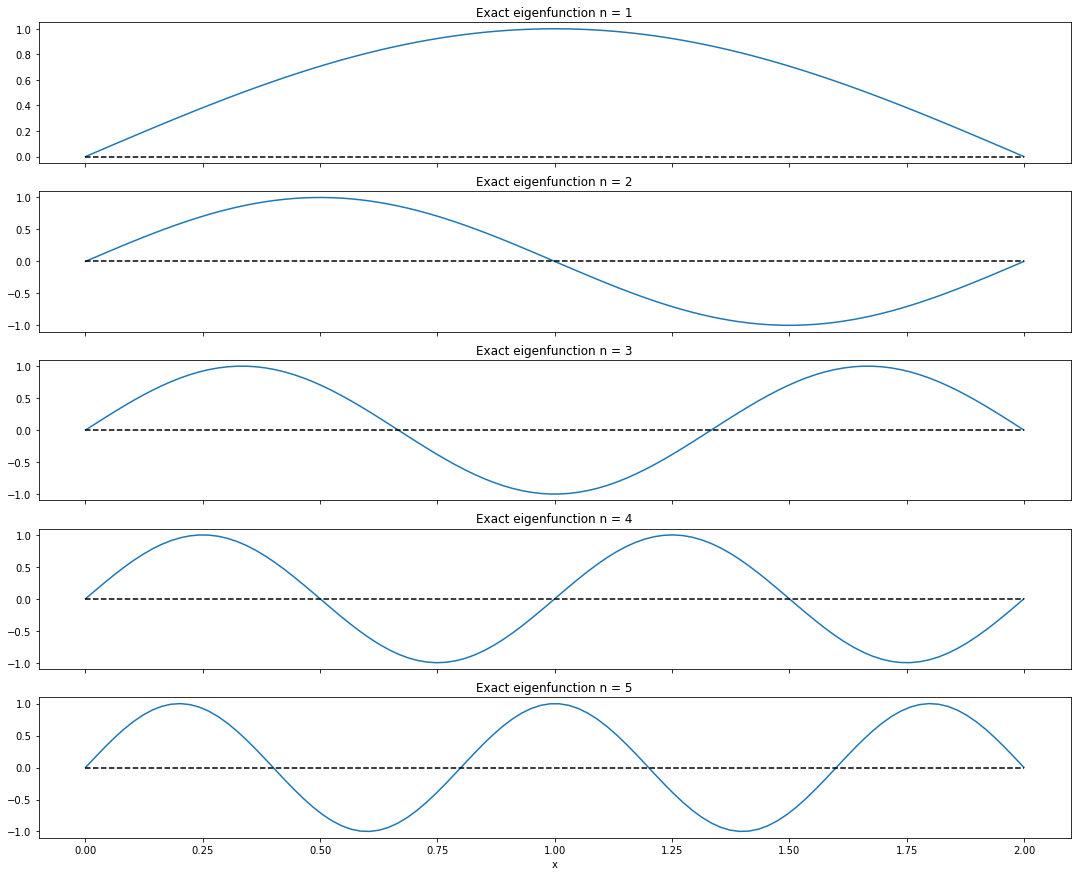

In [37]:
plot_analytical_waves("analytical-waves.png", x, a, n)

### Approximated eigenfunctions
Let's plot the approximated eigen functions considering N = 5 and N = N' = 13

#### Approximated eigenfunctions with N=5

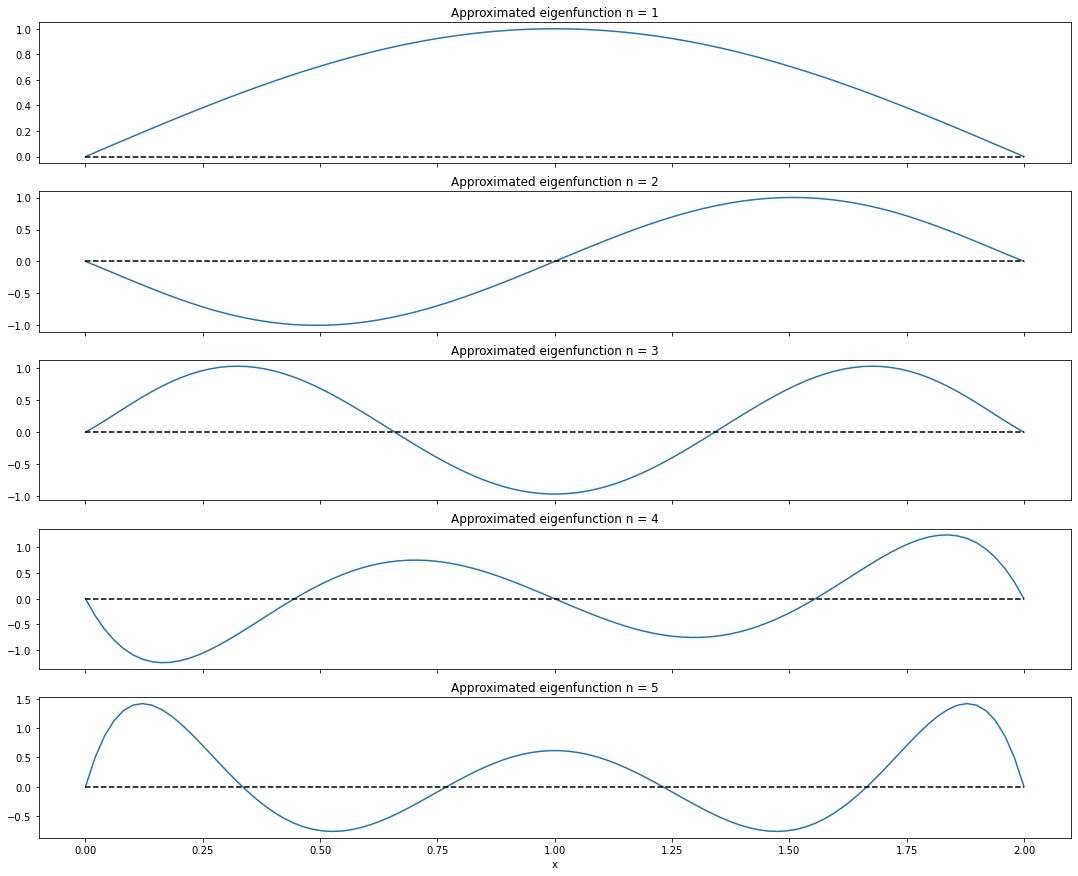

In [38]:
N = 5
E_approx, c_approx =eigenvalues_error_v2(N)
plot_approximated_waves(c_approx, x)

#### Approximated eigenfunctions with N=13

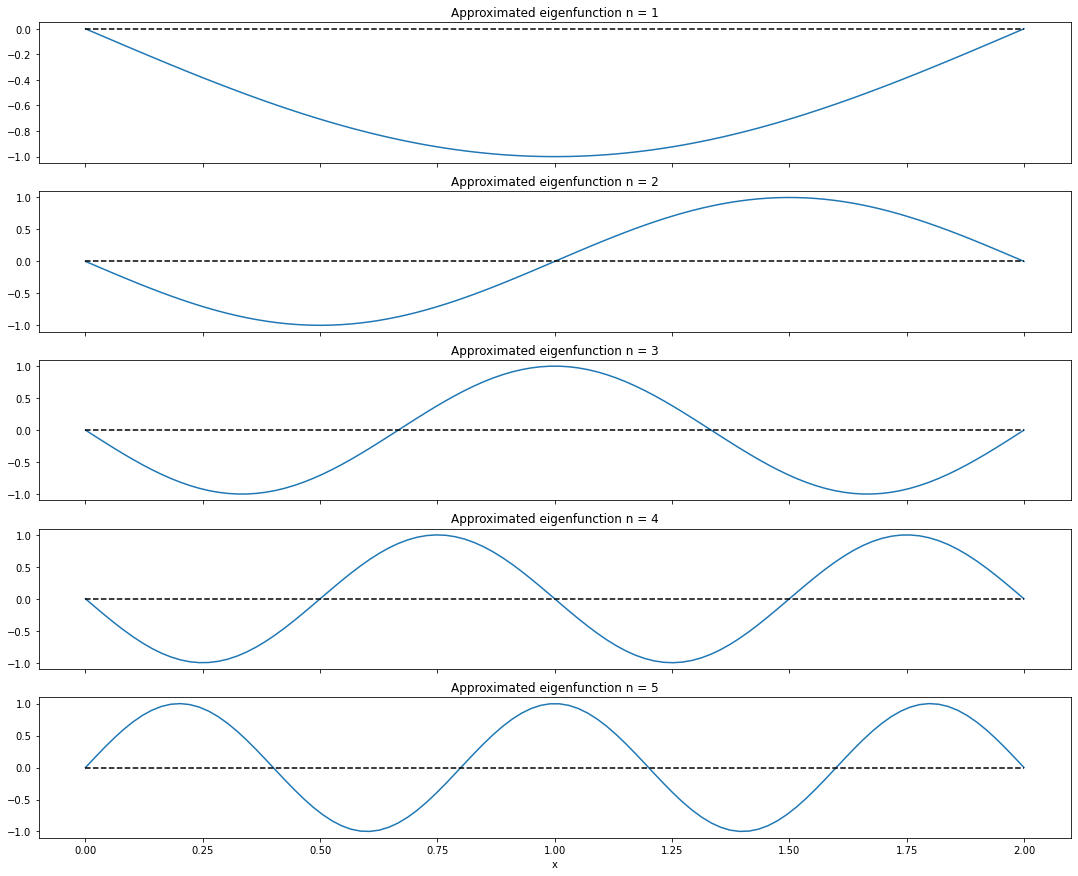

In [39]:
N = 13
E_approx, c_approx =eigenvalues_error_v2(N)
plot_approximated_waves(c_approx, x)

## Question 3

The result is in line with the theorethical expectation. 
The numerical results don't exactly match the analytical results, but tend to converge to the exact values increasing the number of the basis functions. What we notice is that the eigenfunctions that we got with N=5 start to diverge at the fourth energetic level while those obtained with N=13 are much more regular and they constitute a good approximation to the analytical eigenfunctions (at leat for the first 5 eigenvalues).
As we can see from the graphs of the eigenfunctions they are sometimes flipped around the x-axis if compared with the analytical ones. Anyway, what we are really interested in is the probability density:  $|\psi|^2$  and so the fact that some graphs are flipped becomes meaningless.